## Instalamos las librerias que estan en el archivo requirements

In [1]:
!pip install -r requirements.txt


## Importamos las librerias que instalamos y otras que vienen y que vamos a necesitar

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
import missingno as msno

## Leemos el archivo train

In [43]:
df = pd.read_csv('train.csv')

In [44]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Limpiamos algunos datos que son importantes para saber informacion de cada pasajero, que tienen null 

In [45]:
# Funcion para eliminar columnas
def delcol(columnas:list):
    df1 = df.copy()
    for columna in columnas:
        df1 = df1.drop(columna, axis=1)
    return df1

In [46]:
# Eliminamos columnas que no nos datos ploteables 
df = delcol(['PassengerId','Name','Cabin','Destination'])
df

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [47]:
# Funcion para eliminar nulos de las columnas
def nulos(columnas:list,dframe):
    df1 = dframe.copy()
    for columna in columnas:
        df1 = df1[~df1[columna].isnull()]
        df1 = df1[~df1[columna].isna()]
    return df1

<Axes: >

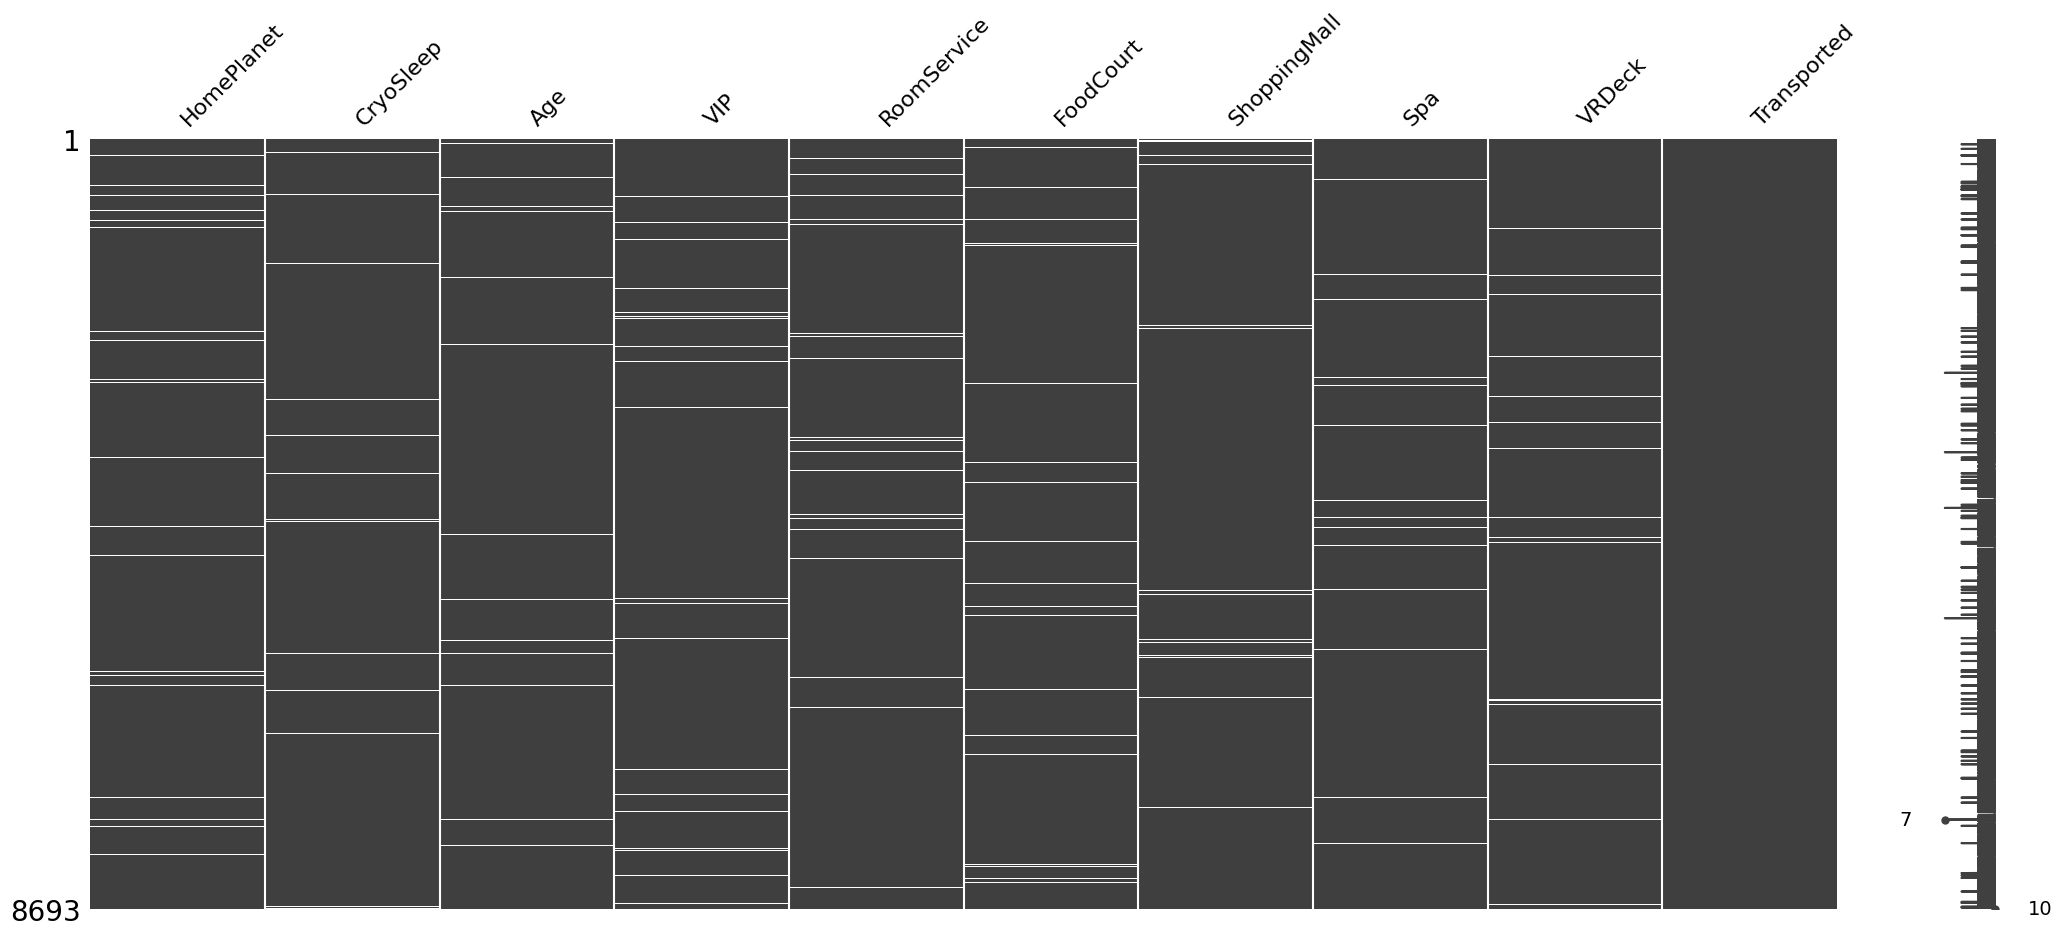

In [48]:
# Visualizamos columnas que contienen nulos
msno.matrix(df)

<Axes: >

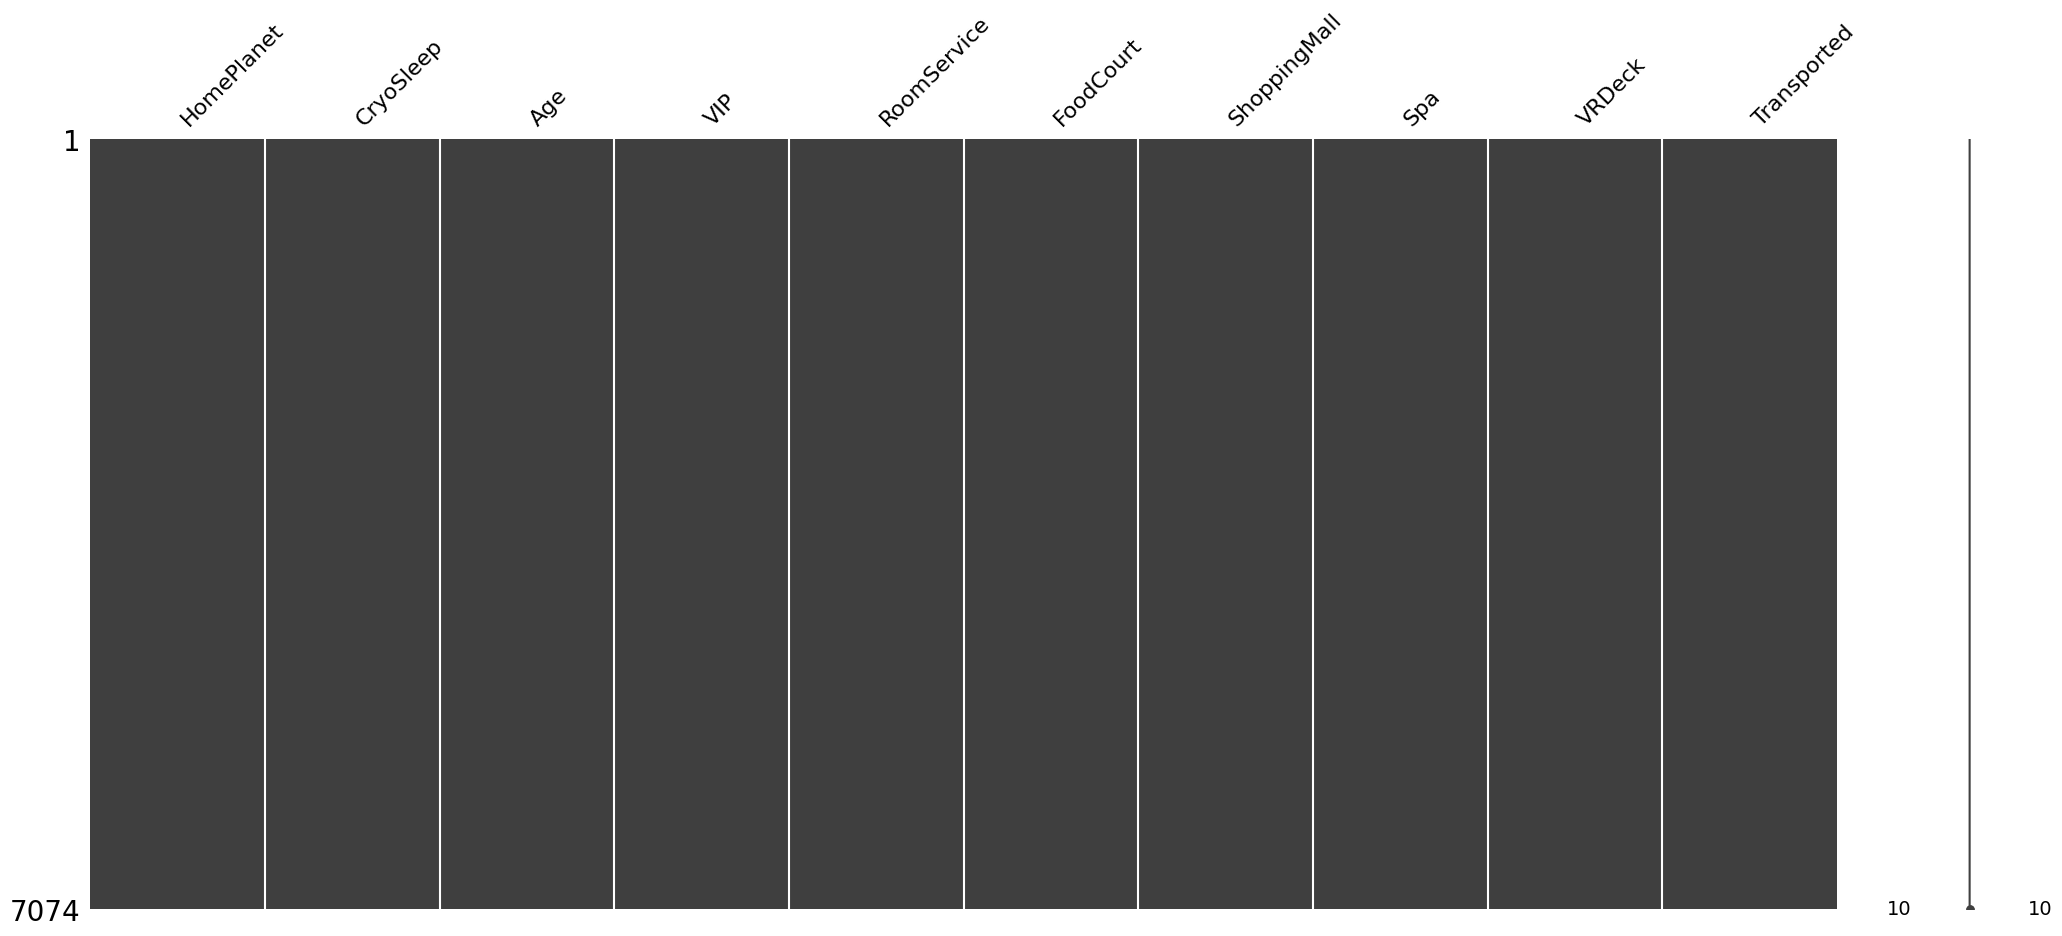

In [49]:
# Eliminamos nulos de las columnas y visualizamos el resultado
features = ['HomePlanet','CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
df = nulos(features,df)
msno.matrix(df)

In [71]:
# Reemplazamos los planetas de donde vienen por numeros
df['HomePlanet'] = df['HomePlanet'].replace({'Europa':0,'Earth':1,'Mars':2})
df

C:\Users\seron\AppData\Local\Temp\ipykernel_15200\2023678639.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HomePlanet'] = df['HomePlanet'].replace({'Europa':0,'Earth':1,'Mars':2})


,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,1,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...
8688,0,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,1,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,1,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,0,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


## Plotemaos las variables, para ver si hay alguna relación con cualquier factor con el ser transportados

In [69]:
# Funcion para plotear recursos y matriz correlacion solo se le entrega el feature y el df
# Ploteamos 
features = ['HomePlanet','CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']
def plotear(features,df):
    sns.pairplot(df[features], hue="Transported")
    correlation_matrix = df[features].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True)
    plt.title('Correlation Matrix')
    plt.show()

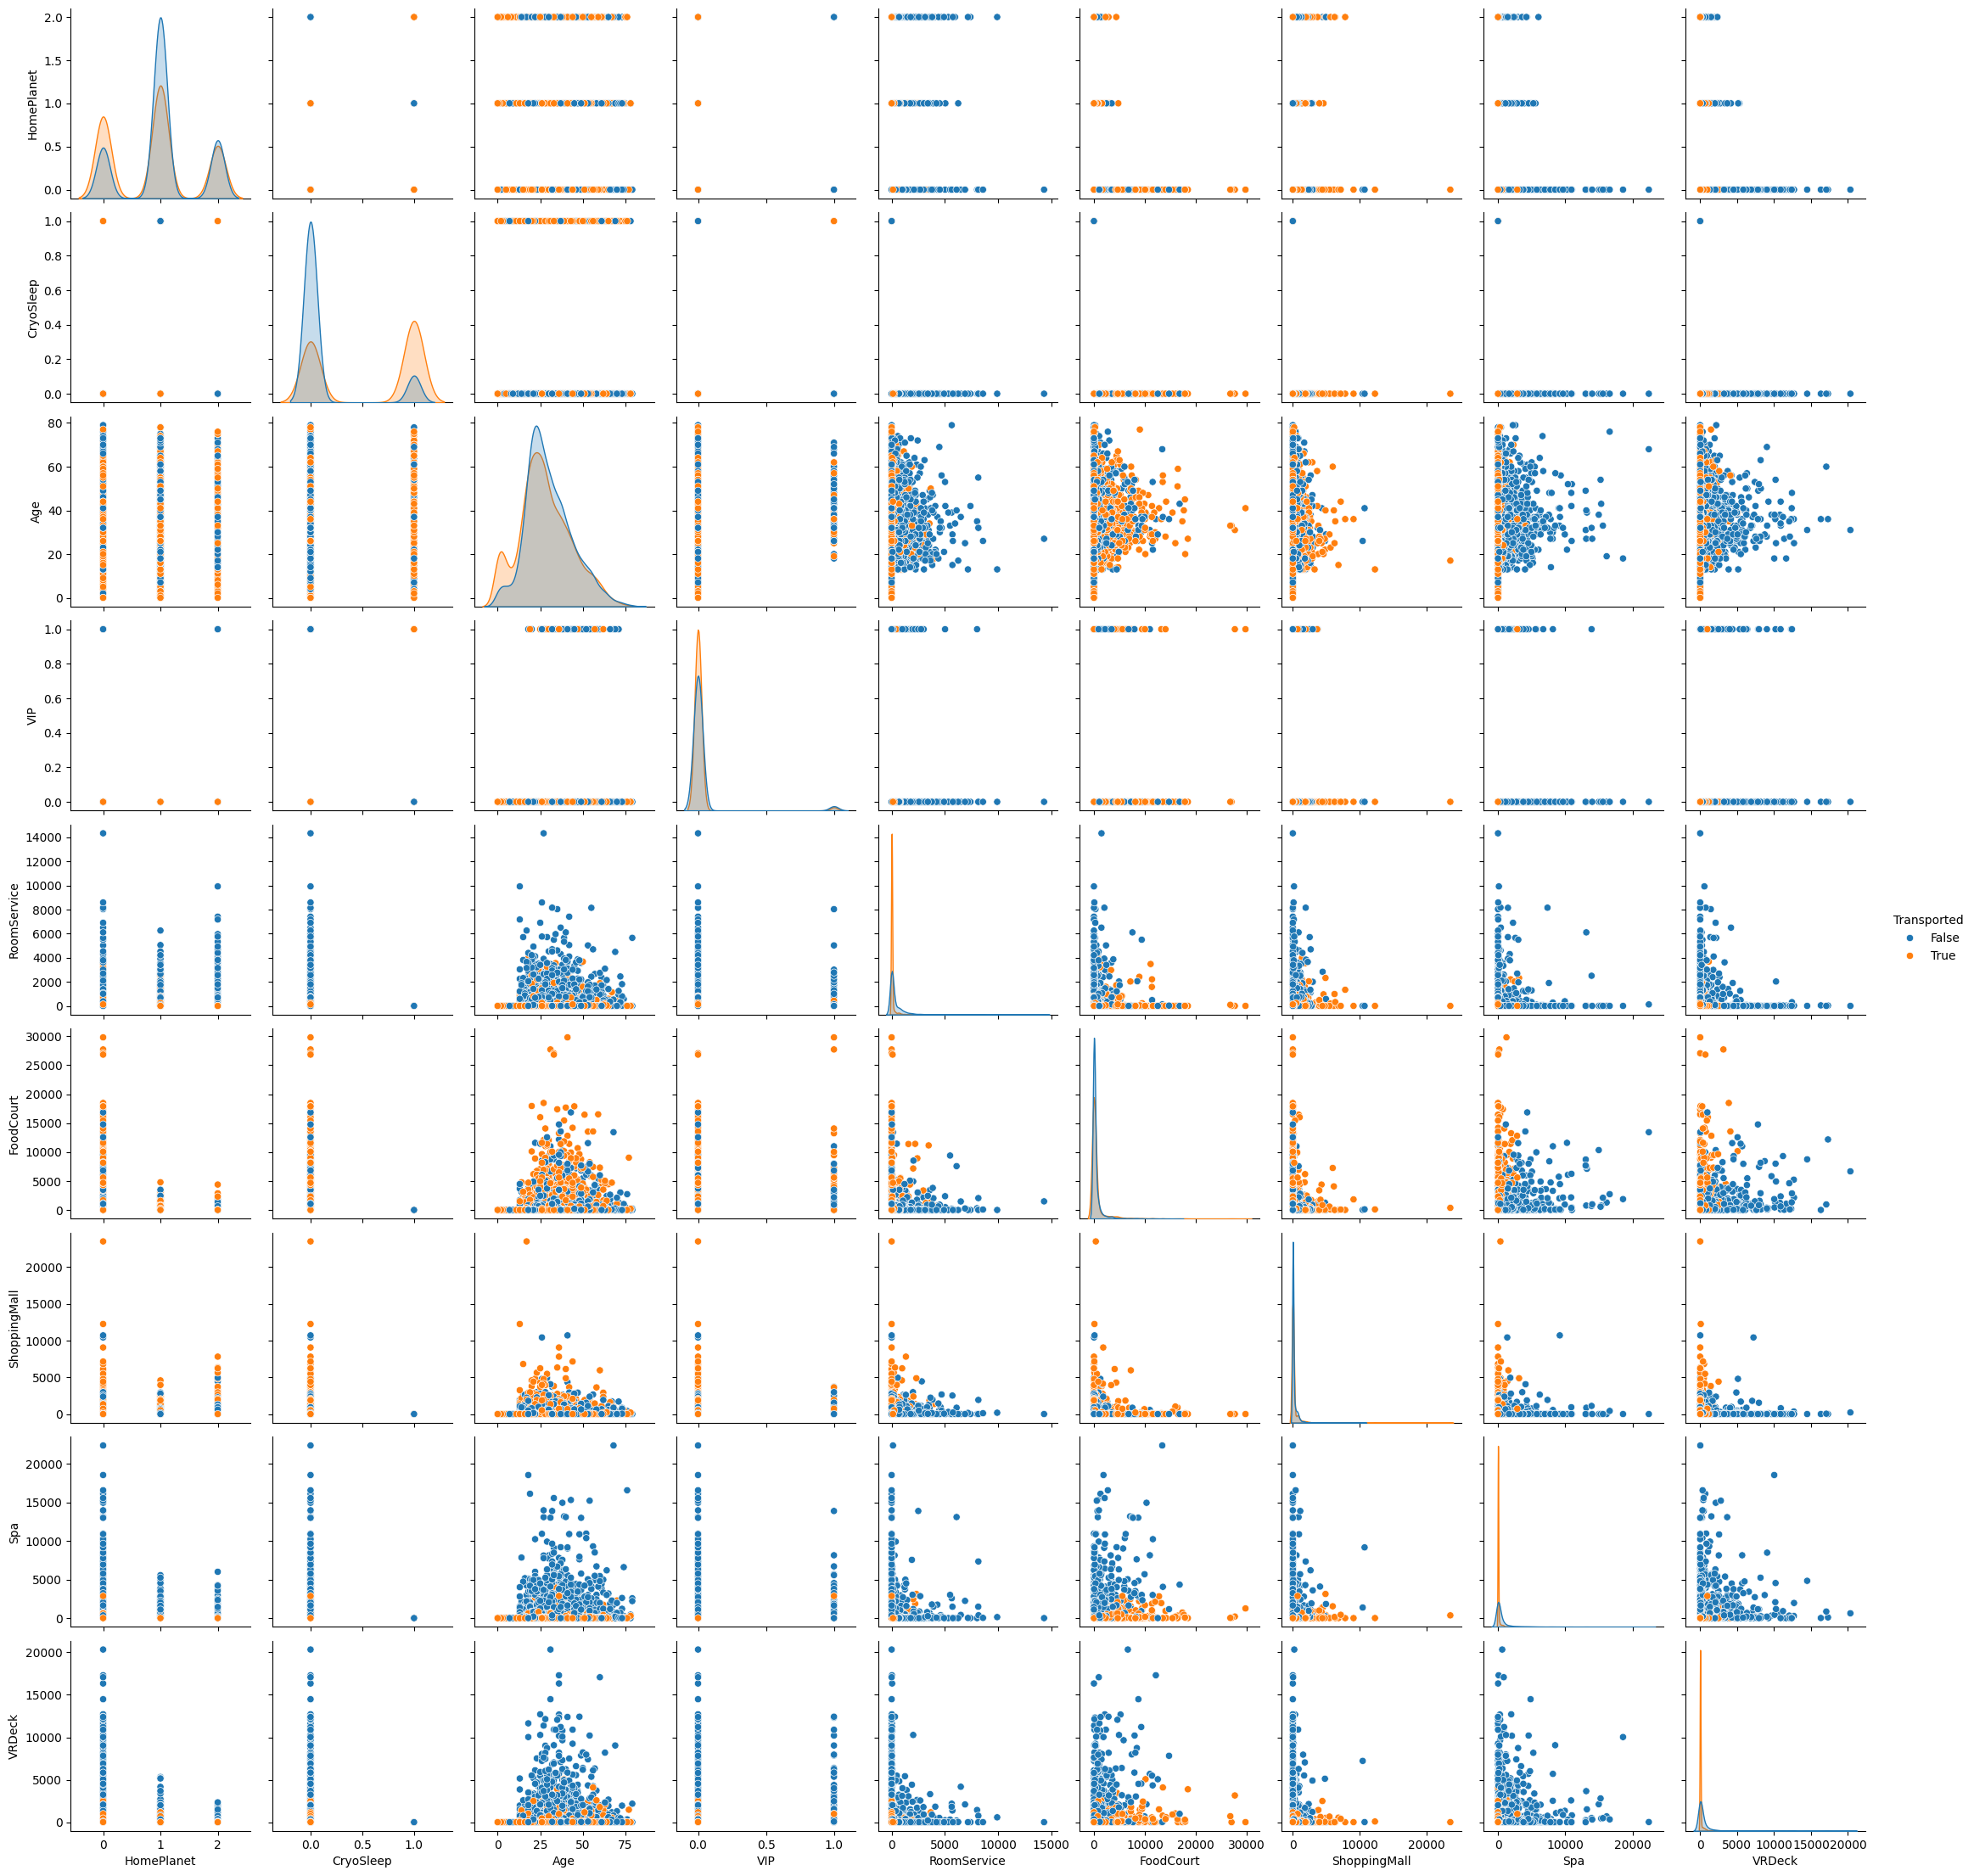

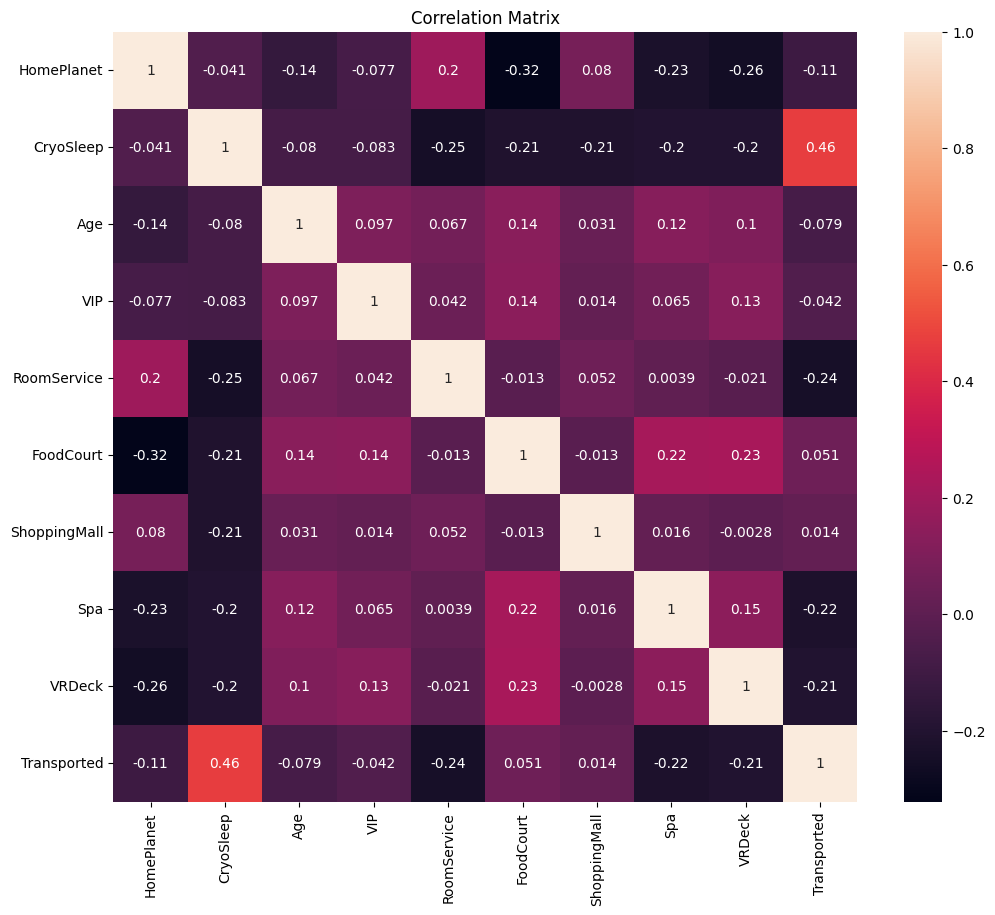

In [72]:
plotear(features,df)

# Podemos ver que hay una relación con los transportados que en RoomService, Spa, VRDeck, que la mayoria de los transportados se encuentran en los que menos utilizaron estos recursos

# Training

In [13]:
X = df.drop('Transported',axis=1)
y = df['Transported']

print(X.shape, y.shape)

(7074, 9) (7074,)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.1)

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

features_importance = rf.feature_importances_

features_importance_df = pd.DataFrame({ 'Feature': X_train.columns,
                                       'Importance': features_importance})

features_importance_df = features_importance_df.sort_values(by='Importance', ascending=False)

In [16]:
features_importance_df

,Feature,Importance
7,Spa,0.160573
4,RoomService,0.144205
2,Age,0.139934
8,VRDeck,0.136804
5,FoodCourt,0.126512
1,CryoSleep,0.109829
6,ShoppingMall,0.109297
0,HomePlanet,0.069729
3,VIP,0.003118


In [18]:
features_select = features_importance_df[features_importance_df['Importance']>0.04]
features_select

features_select_list = list(features_select['Feature'])
features_select_list

['Spa',
 'RoomService',
 'Age',
 'VRDeck',
 'FoodCourt',
 'CryoSleep',
 'ShoppingMall',
 'HomePlanet']

In [19]:
X_train = X_train[features_select_list]
print(X_train.shape)
X_test = X_test[features_select_list]
print(X_test.shape)

(6366, 8)
(708, 8)


<Axes: xlabel='Transported', ylabel='Count'>

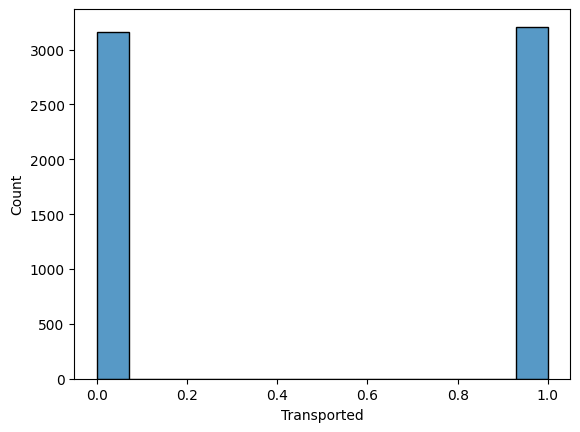

In [20]:
sns.histplot(y_train)

## Cross Validation

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models = {
    'RandomFores':RandomForestClassifier(),
    'SVM':SVC(),
    'GradientBoosting':GradientBoostingClassifier()
}
print(models)

kfold = KFold(n_splits=5,shuffle=True)

model_performance = {}
for name, model in models.items():
  cv_score = cross_val_score(model, X_train, y_train,cv=kfold, scoring='accuracy')
  model_performance[name] = cv_score
  print(name, cv_score, np.mean(cv_score))

{'RandomFores': RandomForestClassifier(), 'SVM': SVC(), 'GradientBoosting': GradientBoostingClassifier()}
RandomFores [0.80062794 0.79890024 0.78554595 0.78161822 0.77297722] 0.7879339154841343
SVM [0.80690738 0.76826394 0.77769049 0.79183032 0.80361351] 0.78966113002697
GradientBoosting [0.79827316 0.77847604 0.81461115 0.79890024 0.78711705] 0.7954755266055906


## Modelo elegido, que tuvo un mejor desempeño fue GradientBoosting

In [22]:
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

GradientBoostingClassifier()

## Test

In [23]:
from sklearn.metrics import accuracy_score

y_pred = gbc.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(score)

0.8234463276836158


### En este caso se separo una parte de los datos de entrenamiento para usar de testeo

## Probamos si funciona el modelo, con el dataset de test que habia en la página

In [26]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [67]:
# Creamos una funcion donde solo se ingresa el dataframe directo del test y nos arroja la prediccion de cada pasajero si fue transportado o no
def modelo(data):
    feature = ['Spa',
 'RoomService',
 'Age',
 'VRDeck',
 'FoodCourt',
 'CryoSleep',
 'ShoppingMall',
 'HomePlanet']
    data = nulos(feature,data)
    data['HomePlanet'] = data['HomePlanet'].replace({'Europa':0,'Earth':1,'Mars':2})
    X_new = data[feature]
    y_new_pred = gbc.predict(X_new)
    df2 = pd.DataFrame(y_new_pred, columns=['Transported'])
    df_final = pd.concat([data, df2], axis=1)
    return df_final

In [66]:
testeo = modelo(test)
testeo

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,1.0,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True
1,0018_01,1.0,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False
2,0019_01,0.0,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True
3,0021_01,0.0,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,True
4,0023_01,1.0,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
